In [1]:
import numpy as np

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
file = np.loadtxt(open("data/safeway/report.csv", "rb"), delimiter=",")
data = file[:,1:]
labels = file[:,0]
colors_ = []
for i in range(991):
    if labels[i] > 13.714:
        colors_.append(5)
    elif labels[i] > 11.428:
        colors_.append(4)
    elif labels[i] > 9.142:
        colors_.append(3)
    elif labels[i] > 6.856:
        colors_.append(2)
    else:
        colors_.append(1)
colors = np.array(colors_)
#print(data.shape)
#print(labels.shape)
#print(colors.shape)

In [3]:
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

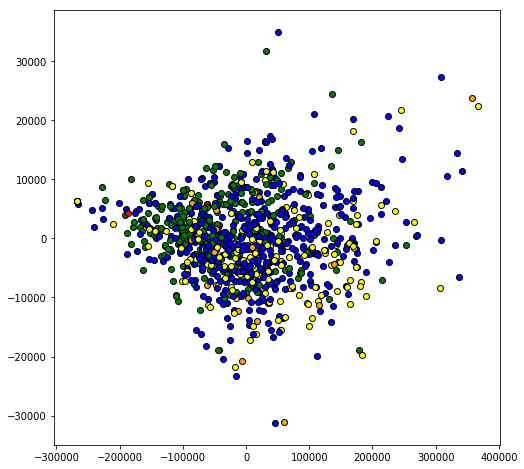

In [4]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
for i in range(991):
    if labels[i] > 4.57:
        color = 'green'
    if labels[i] > 6.856:
        color = 'blue'
    if labels[i] > 9.142:
        color = 'yellow'
    if labels[i] > 11.428:
        color = 'orange'
    if labels[i] > 13.714:
        color = 'red'
    plt.scatter(data_pca[i,0],data_pca[i,1], c=color, edgecolor='black', linewidth='1')
plt.show()

In [5]:
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=2,perplexity=5,learning_rate=1000,n_iter=1000).fit_transform(data)
#print(data_embedded.shape)

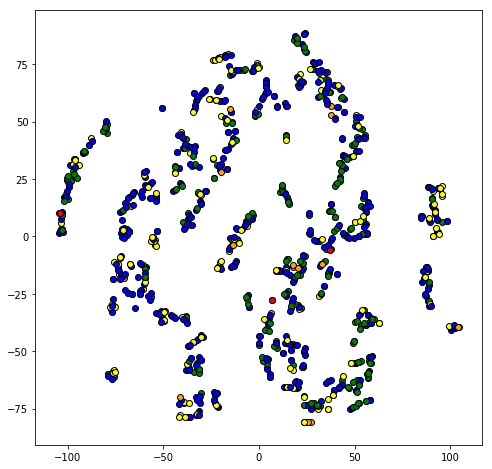

In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(8,8))
for i in range(991):
    if labels[i] > 4.57:
        color = 'green'
    if labels[i] > 6.856:
        color = 'blue'
    if labels[i] > 9.142:
        color = 'yellow'
    if labels[i] > 11.428:
        color = 'orange'
    if labels[i] > 13.714:
        color = 'red'
    plt.scatter(data_embedded[i,0],data_embedded[i,1], c=color, edgecolor='black', linewidth='1')
plt.show()

In [9]:
#'''
from sklearn.metrics import silhouette_score

perplexity = [2, 5, 30, 50, 100]
learning_rate = [10, 100, 1000]
iters = [250, 500, 1000, 2000]
hp_dict = {}
j = 0
for p in perplexity:
    for lr in learning_rate:
        for i in iters:
            print(j)
            j += 1
            data_embedded = TSNE(n_components=2,perplexity=p,learning_rate=lr,n_iter=i).fit_transform(data)
            score = silhouette_score(data_embedded,colors)
            hp = str(p)+"_"+str(lr)+"_"+str(i)
            hp_dict[hp] = score
            plt.figure(figsize=(8,8))
            for i in range(991):
                if labels[i] > 4.57:
                    color = 'green'
                if labels[i] > 6.856:
                    color = 'blue'
                if labels[i] > 9.142:
                    color = 'yellow'
                if labels[i] > 11.428:
                    color = 'orange'
                if labels[i] > 13.714:
                    color = 'red'
                plt.scatter(data_embedded[i,0],data_embedded[i,1], c=color, edgecolor='black', linewidth='1')
            plt.savefig("figures/"+hp+".png")
            plt.close()
print(hp_dict)
#'''

0
1
{'1_1_250': -0.12030151, '1_2_250': -0.13775352}
